In [20]:
%matplotlib inline

In [15]:
!ls ../datafolder/ROI/image/train/CE1/0317_CE1_1.jpg


0317_CE1_1.jpg	    a216_2_CE1_1.jpg	h00760_CE1_1.jpg  h05675_CE1_1.jpg
0455_CE1_1.jpg	    a216_6_CE1_1.jpg	h00762_CE1_1.jpg  h05698_CE1_1.jpg
0522_CE1_1.jpg	    a218_107_CE1_1.jpg	h00762_CE1_2.jpg  h05708_CE1_1.jpg
0725_CE1_1.jpg	    a219_89_CE1_1.jpg	h00762_CE1_3.jpg  h05709_CE1_1.jpg
0752_CE1_1.jpg	    a222_17_CE1_1.jpg	h00764_CE1_1.jpg  h05710_CE1_1.jpg
0753_CE1_1.jpg	    a224_25_CE1_1.jpg	h00764_CE1_2.jpg  h05713_CE1_1.jpg
0826_CE1_1.jpg	    a225_67_CE1_1.jpg	h00778_CE1_1.jpg  h05714_CE1_1.jpg
0827_CE1_1.jpg	    a226_86_CE1_1.jpg	h00779_CE1_1.jpg  h05715_CE1_1.jpg
a0001_1_CE1_1.jpg   a303_21_CE1_1.jpg	h00793_CE1_1.jpg  h05720_CE1_1.jpg
a0002_1_CE1_1.jpg   a303_41_CE1_1.jpg	h00798_CE1_1.jpg  h05780_CE1_1.jpg
a0003_2_CE1_1.jpg   a304_1_CE1_1.jpg	h00804_CE1_1.jpg  h05788_CE1_1.jpg
a0003_2_CE1_2.jpg   a304_41_CE1_1.jpg	h00814_CE1_1.jpg  h05795_CE1_1.jpg
a0009_2_CE1_1.jpg   a304_51_CE1_1.jpg	h00814_CE1_2.jpg  h05796_CE1_1.jpg
a0010_1_CE1_1.jpg   a305_46_CE1_1.jpg	h00848_CE1_1.jpg  h0590

In [44]:
import cv2
import os
import numpy as np
import albumentations as A
import random
import glob

In [10]:
import matplotlib.pyplot as plt 

In [27]:
def augment_and_show(aug, image, mask=None, bboxes=[], categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, 
                     font_scale_aug=0.35, show_title=True, **kwargs):

    augmented = aug(image=image, mask=mask, bboxes=bboxes, category_id=categories)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)

    for bbox in bboxes:
        visualize_bbox(image, bbox, **kwargs)

    for bbox in augmented['bboxes']:
        visualize_bbox(image_aug, bbox, **kwargs)

    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    
    if mask is None:
        f, ax = plt.subplots(1, 2, figsize=(16, 8))
        
        ax[0].imshow(image)
        ax[0].set_title('Original image')
        
        ax[1].imshow(image_aug)
        ax[1].set_title('Augmented image')
    else:
        f, ax = plt.subplots(2, 2, figsize=(16, 16))
        
        if len(mask.shape) != 3:
            mask = label2rgb(mask, bg_label=0)            
            mask_aug = label2rgb(augmented['mask'], bg_label=0)
        else:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            mask_aug = cv2.cvtColor(augmented['mask'], cv2.COLOR_BGR2RGB)
            
        ax[0, 0].imshow(image)
        ax[0, 0].set_title('Original image')
        
        ax[0, 1].imshow(image_aug)
        ax[0, 1].set_title('Augmented image')
        
        ax[1, 0].imshow(mask, interpolation='nearest')
        ax[1, 0].set_title('Original mask')

        ax[1, 1].imshow(mask_aug, interpolation='nearest')
        ax[1, 1].set_title('Augmented mask')

    f.tight_layout()
    if filename is not None:
        f.savefig(filename)
        
    return augmented['image'], augmented['mask'], augmented['bboxes']

def find_in_dir(dirname):
    return [os.path.join(dirname, fname) for fname in sorted(os.listdir(dirname))]

In [361]:
light = A.Compose([
    A.RandomBrightnessContrast(p=1),    
    A.RandomGamma(p=1),    
    A.CLAHE(p=1),    
], p=1)
medium = A.Compose([
    A.CLAHE(p=1),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
], p=1)

strong = A.Compose([
    A.ChannelShuffle(p=1),
], p=1)
flip=A.HorizontalFlip(p=0.5)
shape=A.Compose([
    A.MotionBlur(),
    A.Cutout(p=1)])

train_trans=A.Compose([
A.OneOf([
    A.CLAHE(clip_limit=2),
    A.RandomGamma(),
    A.NoOp(),
    A.RandomBrightnessContrast(),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
    A.ChannelShuffle(p=1)
])])

In [343]:

scale= A.Compose([
    A.RandomScale(),
    A.SmallestMaxSize(max_size=250),
    A.RandomCrop(224,224)])

In [353]:
random.seed(42)
images=glob.glob('../datafolder/ROI/image/train/*/*.jpg')
image_path=np.random.choice(images)
image = cv2.imread(image_path)

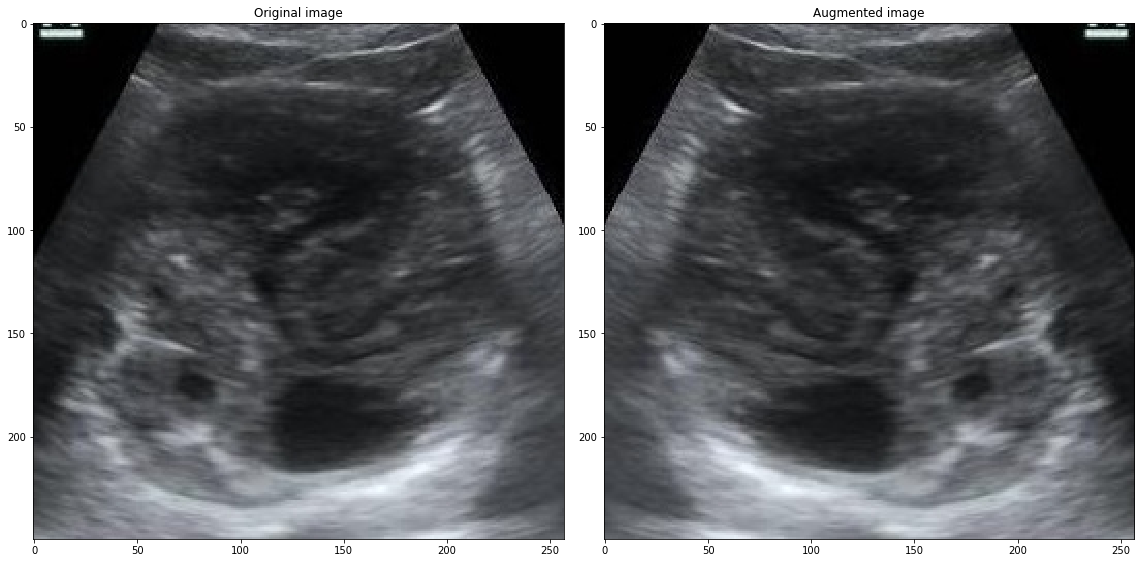

In [368]:
r=augment_and_show(flip,image)

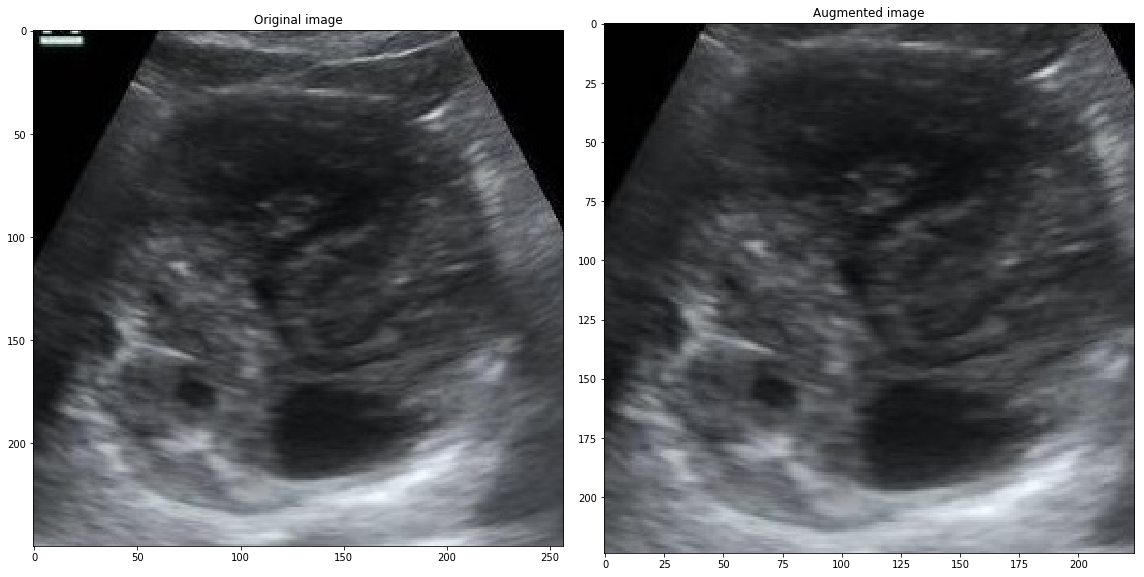

In [364]:
r=augment_and_show(scale,image)

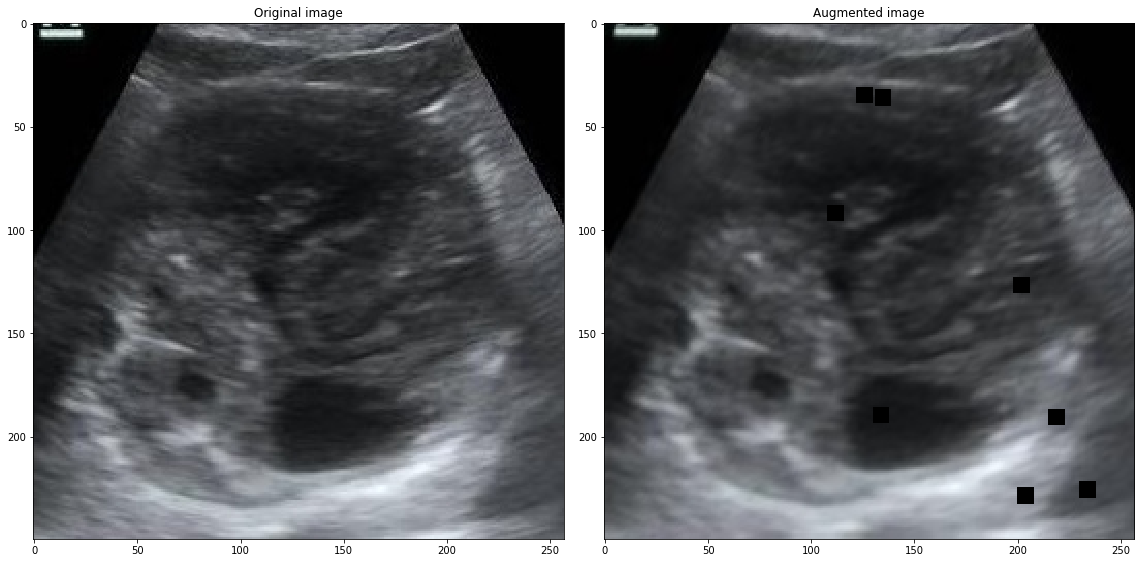

In [365]:
r=augment_and_show(shape,image)

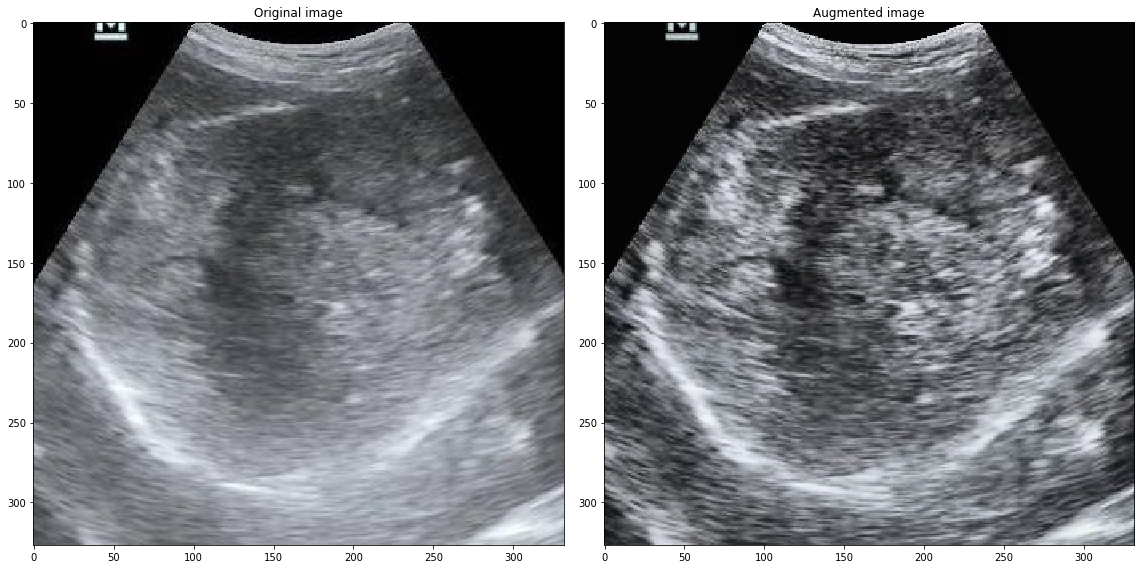

In [326]:
r=augment_and_show(light,image)

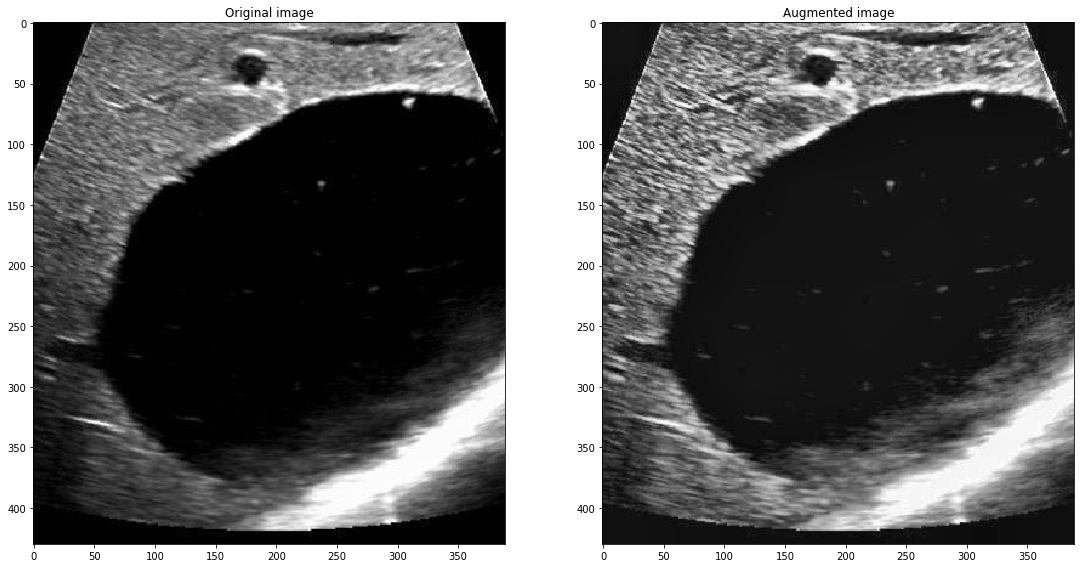

In [269]:
r = augment_and_show(light, image)

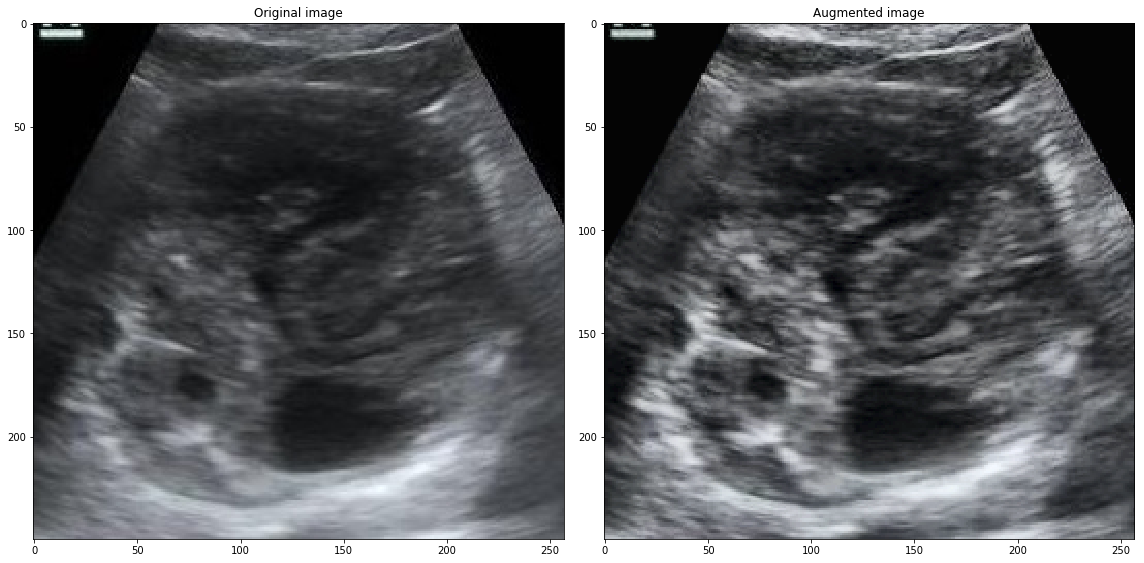

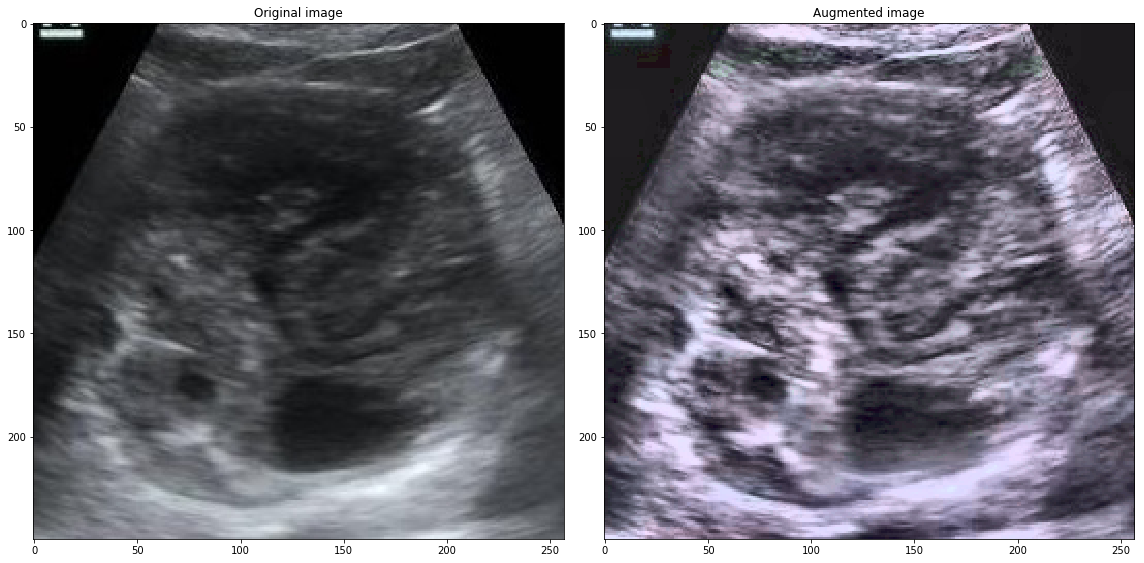

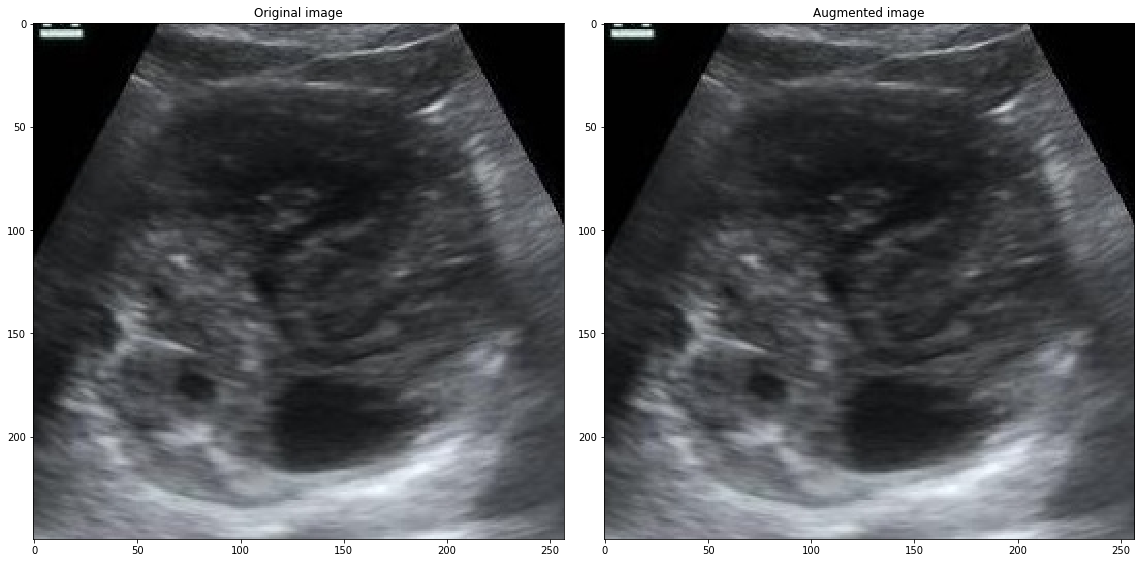

In [369]:

r = augment_and_show(light, image)
r = augment_and_show(medium, image)
r = augment_and_show(strong, image)